In [7]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 18 14:58:00 2020

@author: Christoph
"""
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import lmfit

In [8]:
# importar os dados
data = pd.read_excel('resfriamento_termometro.xlsx')
display(data.tail()); print();

tempo=data['Tempo (s)'].to_numpy()[:-1]
print(tempo[-1])
Temperature = data['Temperatura (K)'].to_numpy()[:-1]
print(Temperature[-1])

,Tempo (s),Temperatura (°C),Temperatura (K)
35,261.0,31.0,304.0
36,301.0,30.0,303.0
37,346.0,29.0,302.0
38,411.0,28.0,301.0
39,601.0,27.0,300.0



411.0
301.0


No handles with labels found to put in legend.
[[Model]]
    Model(exp_cooling)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 67
    # data points      = 39
    # variables        = 3
    chi-square         = 63.2640896
    reduced chi-square = 1.75733582
    Akaike info crit   = 24.8664925
    Bayesian info crit = 29.8571774
[[Variables]]
    T0:     364.771182 +/- 0.69872152 (0.19%) (init = 350)
    T_inf:  303.000000 +/- 0.46241653 (0.15%) (init = 299)
    gamma:  0.01430855 +/- 4.2109e-04 (2.94%) (init = 0.001)
[[Correlations]] (unreported correlations are < 0.100)
    C(T_inf, gamma) =  0.798
    C(T0, gamma)    =  0.640
    C(T0, T_inf)    =  0.303
último valor = 303.01137880494616


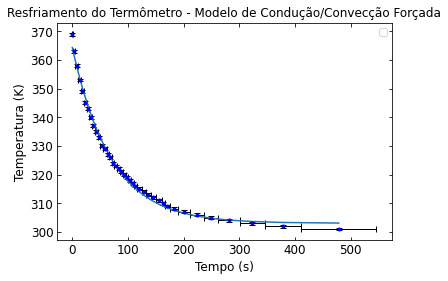

In [9]:
tempo_intervall=np.diff(tempo)/2
tempo_intervall=np.append(tempo_intervall,[67.5])

tempo=tempo+tempo_intervall

fig,ax1 = plt.subplots()

ax1.errorbar(tempo,Temperature,yerr=0.5,xerr=tempo_intervall,fmt='o',elinewidth=1,capsize=3,capthick=1,ms=3,c='b',ecolor='black')

ax1.tick_params(direction='in', which='both',top=True,right=True,labelsize=12)
ax1.set_ylabel('Temperatura (K)',fontsize=12)
ax1.set_xlabel('Tempo (s)',fontsize=12)
ax1.set_title("Resfriamento do Termômetro - Modelo de Condução/Convecção Forçada")


# plt.tight_layout()
# plt.show()


def exp_cooling(t,T0,T_inf,gamma):
    return (T0-T_inf)*np.exp(-gamma*t)+T_inf

def cooling(t,T0,A,B,C,m):
    return T0+(A/(B+C*t)**m)


exp_model=lmfit.Model(exp_cooling)

exp_model.set_param_hint('T0',value=350,min=340,max=370,vary=True)
exp_model.set_param_hint('T_inf',value=26+273,min=20+273,max=30+273,vary=True)
exp_model.set_param_hint('gamma',value=0.001,min=0.0001,vary=True)
param = exp_model.make_params()

results = exp_model.fit(Temperature, t = tempo, params = param)
print(results.fit_report())

ax1.plot(tempo,results.best_fit)
ultimo_valor_exp_cooling = results.eval(t=601)
print("último valor =", ultimo_valor_exp_cooling)

plt.legend(loc='best')
plt.savefig("modelo1.png", dpi=1200)

parameter names: ['T0', 'A', 'B', 'C', 'm']
independent variables: ['t']
[[Model]]
    Model(cooling)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 97
    # data points      = 39
    # variables        = 5
    chi-square         = 65.9801216
    reduced chi-square = 1.94059181
    Akaike info crit   = 30.5058827
    Bayesian info crit = 38.8236909
[[Variables]]
    T0:  259.333706 +/- 15.7296641 (6.07%) (init = 350)
    A:   590.047590 +/- 24580696.4 (4165883.71%) (init = 523)
    B:   147.881968 +/- 18481760.9 (12497643.36%) (init = 350)
    C:   8.04141301 +/- 1004986.68 (12497637.86%) (init = 11)
    m:   0.33333333 +/- 0.01946057 (5.84%) (init = 0.25)
[[Correlations]] (unreported correlations are < 0.100)
    C(B, C)  =  1.000
    C(A, B)  =  1.000
    C(A, C)  =  1.000
    C(T0, m) = -0.994
último valor = 293.8842463638528


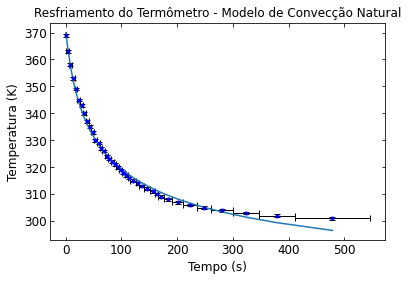

In [10]:

cooling_model=lmfit.Model(cooling)
print('parameter names: {}'.format(cooling_model.param_names))
print('independent variables: {}'.format(cooling_model.independent_vars))

fig,ax2 = plt.subplots()

ax2.errorbar(tempo,Temperature,yerr=0.5,xerr=tempo_intervall,fmt='o',elinewidth=1,capsize=3,capthick=1,ms=3,c='b',ecolor='black')
ax2.tick_params(direction='in', which='both',top=True,right=True,labelsize=12)

ax2.set_ylabel('Temperatura (K)',fontsize=12)
ax2.set_xlabel('Tempo (s)',fontsize=12)
ax2.set_title("Resfriamento do Termômetro - Modelo de Convecção Natural")

#plt.tight_layout()

cooling_model.set_param_hint('m',value=1/4,vary=True,min=1/6, max=1/3)
cooling_model.set_param_hint('T0',value=350,vary=True)
cooling_model.set_param_hint('A',value=523,min=0.0001, vary=True)
cooling_model.set_param_hint('B',value=350,min=1,vary=True)
cooling_model.set_param_hint('C',value=11,min=1,vary=True)
param = cooling_model.make_params()

results = cooling_model.fit(Temperature, t = tempo, params = param)
print(results.fit_report())

ax2.plot(tempo,results.best_fit)

ultimo_valor_cooling = results.eval(t=601)
print("último valor =", ultimo_valor_cooling)
plt.savefig("modelo2.png", dpi=1200)

In [11]:
diff = (ultimo_valor_exp_cooling**2 - data['Temperatura (K)'].to_numpy()[-1]**2)
print(diff)

1815.895685274576


In [12]:
diff = (ultimo_valor_cooling**2 - data['Temperatura (K)'].to_numpy()[-1]**2)
print(diff)

-3632.049739150272
